<div align="right">March 2021</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/ME208583/hws/merobo21_hw1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 01208583 Homework # 1

Using RTSX toolbox, below is Scilab script to plot 3-segment quintic polynomial trajectory in Figure 1

<p align="center">
<img src="https://drive.google.com/uc?id=1--OfmHoZrsxn7S1lJXVLUuI00Rh2cUeC" width=500 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 3-segment quintic polynomial trajectory</b></div>

In [ ]:
// #Scilab script example. Do not run this cell.
// #command trajectory generation

t1=0:0.01:1.99;
t2 = 0:0.01:0.99;

// joint 1 trajectory
[q11,qd11,qdd11]=qpoly(0,10,t1,0,10);  // segment 1
[q12,qd12,qdd12]=qpoly(10,-5,t1,10,-5);  // segment 2
[q13,qd13,qdd13]=qpoly(-5,0,t2,-5,0);  // segment 3

q1 = [q11;q12;q13];     // position (angles)
qd1 = [qd11;qd12;qd13];  // velocity
qdd1 = [qdd11;qdd12;qdd13];  // acceleration

t=0:0.01:4.99;
t=t';

figure(1);
subplot(311), plot(t, q1,'r-')
//xlabel('time (sec)')
ylabel('angles')

subplot(312), plot(t, qd1,'b-')
//xlabel('time (sec)')
ylabel('velocity')

subplot(313), plot(t, qdd1, 'g-')
xlabel('time (sec)')
ylabel('acceleration')


Here is the Scilab script for qpoly function

In [ ]:
// #Scilab script. Do not run this cell.
function [s,sd,sdd] = qpoly(q0, qf, t, qd0, qdf)

    t0 = t;
    nargin=argn(2);
    nargout = argn(1);
    if isscalar(t)
		t = (0:t-1)';
    else
        t = t(:);
    end
    if nargin < 4
        qd0 = 0;
    end
    if nargin < 5
        qdf = 0;
    end
    
    tf = max(t);
    
    // solve for the polynomial coefficients using least squares
    X = [
        0           0           0         0       0   1
        tf^5        tf^4        tf^3      tf^2    tf  1
        0           0           0         0       1   0
        5*tf^4      4*tf^3      3*tf^2    2*tf    1   0
        0           0           0         2       0   0
        20*tf^3     12*tf^2     6*tf      2       0   0
    ];
    b = [q0 qf qd0 qdf 0 0]';
    coeffs = (inv(X)*b)';    
    // coefficients of derivatives 
    coeffs_d = coeffs(1:5) .* (5:-1:1);
    coeffs_dd = coeffs_d(1:4) .* (4:-1:1);

    // evaluate the polynomials
    p = polyval(coeffs, t);
    pd = polyval(coeffs_d, t);
    pdd = polyval(coeffs_dd, t);

    select nargout

        case 1
            s = p;
        case 2
            s = p;
            sd = pd;
        case 3
            s = p;
            sd = pd;
            sdd = pdd;
    end
    
endfunction

Use Python to generate the same trajectory. Plot position, velocity, and acceleration. The result should look like 
Figure 2 below.

<p align="center">
<img src="https://drive.google.com/uc?id=1gCZma5Pixrfl1hvQxl9Yc1F0Wp0XtwUp" width=500 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 3-segment quintic polynomial trajectory using numpy and matplotlib</b></div>

For simplicity, assume that t argument is always a vector in qpoly() function


### Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# define quintic polynomial function
def qpoly(q0,qf,t,qd0=0, qdf=0):
    tf = max(t)
    X = np.array([[0.,0.,0.,0.,0.,1.],[tf**5,tf**4,tf**3,tf**2,tf,1],[0.,0.,0.,0.,1.,0.],
                 [5*tf**4,4*tf**3,3*tf**2,2*tf,1.,0.],[0.,0.,0.,2.,0.,0.],[20*tf**3,12*tf**2,6*tf,2.,0.,0.]])
    b = np.array([q0,qf,qd0,qdf,0.,0.]).T
    coeffs = np.linalg.inv(X)@b
    # coefficients of derivatives
    coeffs_d = coeffs[0:5]*np.arange(5,0,-1)
    coeffs_dd = coeffs_d[0:4]*np.arange(4,0,-1)
    q = polyval(coeffs,t)
    q_d = polyval(coeffs_d,t)
    q_dd = polyval(coeffs_dd,t)
    return q,q_d,q_dd
    

In [41]:
# helper function to evaluate polynomial
def polyval(P,X):
    Y = 0*X
    n = len(P)
    for i in range(n):
        Y = Y +P[i]*X**(n-i-1)
    return Y

In [ ]:
# generate trajectory for each segment.
t1 = np.arange(0,2,0.01)
t2 = np.arange(0,1,0.01)
q11,qd11,qdd11 = qpoly(0,10,t1,0,10)
q12,qd12,qdd12 = qpoly(10,-5,t1,10,-5)
q13,qd13,qdd13 = qpoly(-5,0,t2,-5,0)

In [56]:
# join the segments
q1 = np.hstack((q11,q12,q13))
qd1 = np.hstack((qd11,qd12,qd13))
qdd1 = np.hstack((qdd11,qdd12,qdd13))
t = np.arange(0,5,0.01)


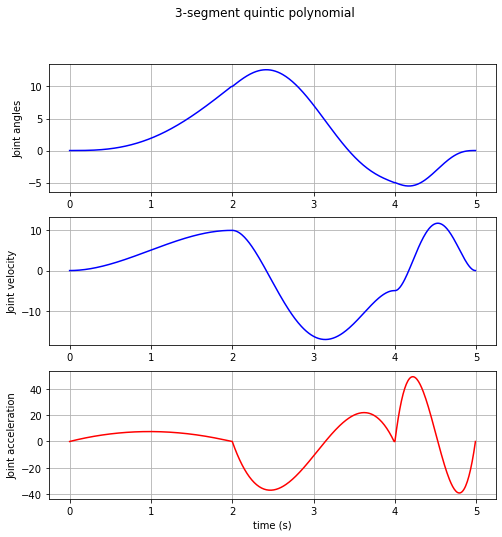

In [57]:
# Plot the trajectory
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,8))
fig.suptitle('3-segment quintic polynomial')
ax1.plot(t,q1,'b-')
ax1.grid(True)
ax1.set_ylabel('Joint angles')

ax2.plot(t,qd1,'b-')
ax2.grid(True)
ax2.set_ylabel('Joint velocity')

ax3.plot(t,qdd1,'r-')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('Joint acceleration')
ax3.grid(True)
